<a href="https://colab.research.google.com/github/PreetiNegi04/Dogs-Vs-Cats-Detection/blob/main/Dogs_and_Cats_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dog Cat Classificatio**n

Extracting dataset from kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing dataset

In [ ]:
!kaggle datasets download -d kasikrit/308-456-dogs-vs-cats-dataset

Dataset URL: https://www.kaggle.com/datasets/kasikrit/308-456-dogs-vs-cats-dataset
License(s): unknown
100% 543M/546M [00:37<00:00, 15.5MB/s]
100% 546M/546M [00:37<00:00, 15.2MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/308-456-dogs-vs-cats-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
import os

path, dir, files = next(os.walk('/content/dataset_dogs_vs_cats/train/dogs'))
file_count = len(files)
print(file_count)

3123


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

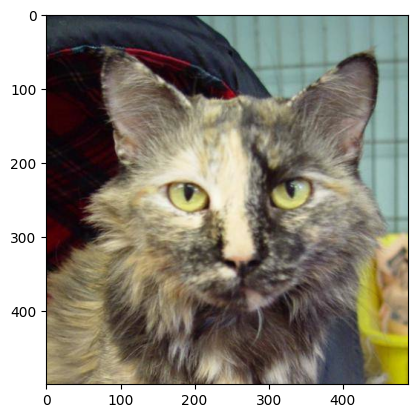

In [ ]:
img = mpimg.imread('/content/dataset_dogs_vs_cats/train/cats/cat.10.jpg')
imgplt = plt.imshow(img)

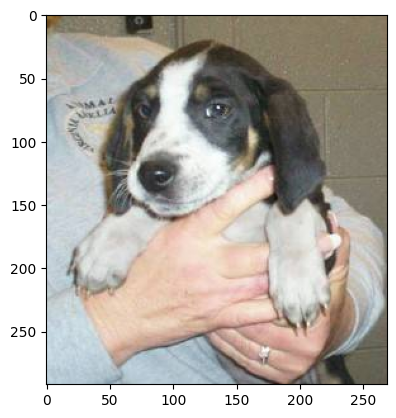

In [ ]:
img = mpimg.imread('/content/dataset_dogs_vs_cats/train/dogs/dog.10.jpg')
imgplt = plt.imshow(img)

In [ ]:
#import shutil

#folder_path = '/content/image resized'  # Replace with the path to your folder
#shutil.rmtree(folder_path)


In [ ]:
#creating a directory for resized images

os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/dataset_dogs_vs_cats/train/cats/'
resized_folder = '/content/image resized/'

for i in range(1000):
  file_name = os.listdir('/content/dataset_dogs_vs_cats/train/cats')[i]
  img = Image.open(original_folder + file_name)
  img = img.resize((224,224))
  img = img.convert('RGB')
  img.save(resized_folder + file_name)

In [ ]:
original_folder = '/content/dataset_dogs_vs_cats/train/dogs/'
for i in range(1000):
  file_name = os.listdir('/content/dataset_dogs_vs_cats/train/dogs')[i]
  img = Image.open(original_folder + file_name)
  img = img.resize((224,224))
  img = img.convert('RGB')
  img.save(resized_folder + file_name)

In [ ]:
images = os.listdir('/content/image resized/')
print(len(images))

2000


In [ ]:
print(images[:10])

['cat.2711.jpg', 'dog.895.jpg', 'cat.5688.jpg', 'cat.12443.jpg', 'dog.11645.jpg', 'dog.11330.jpg', 'dog.10770.jpg', 'dog.10922.jpg', 'dog.7841.jpg', 'dog.1345.jpg']


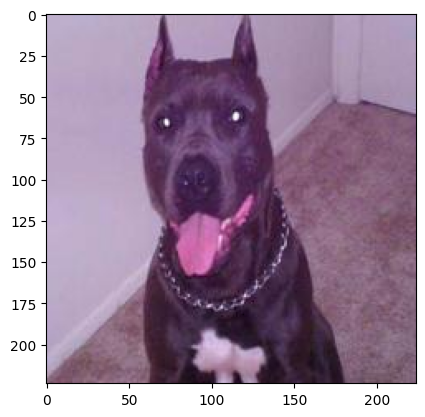

In [ ]:
img = mpimg.imread('/content/image resized/dog.11645.jpg')
imgplt = plt.imshow(img)

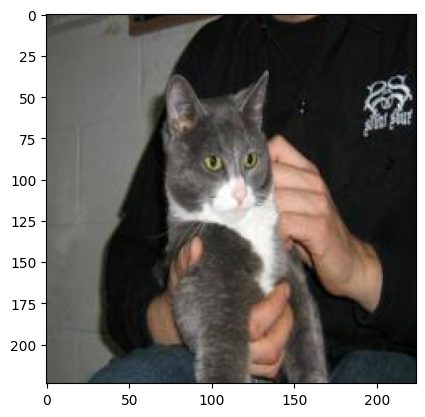

In [ ]:
img = mpimg.imread('/content/image resized/cat.2711.jpg')
imgplt = plt.imshow(img)

Creating labels for resized images of Dogs and cats

Cat ----> 0
Dog ----> 1

In [ ]:
labels = []
filename = os.listdir('/content/image resized/')
for i in filename:
  if i.startswith('cat'):
    labels.append(0)
  else:
    labels.append(1)


In [ ]:
print(filename[:10])
print(labels[:10])

['cat.2711.jpg', 'dog.895.jpg', 'cat.5688.jpg', 'cat.12443.jpg', 'dog.11645.jpg', 'dog.11330.jpg', 'dog.10770.jpg', 'dog.10922.jpg', 'dog.7841.jpg', 'dog.1345.jpg']
[0, 1, 0, 0, 1, 1, 1, 1, 1, 1]


Converting resized images to numpy array

In [ ]:
import cv2
import glob

In [ ]:
image_dir = '/content/image resized/'
image_ext = ['jpg', 'png']
files = []
[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_ext]
dof_cat_img = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dof_cat_img)

[[[[ 67  72  71]
   [ 62  67  66]
   [ 58  63  62]
   ...
   [ 17  17  17]
   [ 19  19  19]
   [ 19  19  19]]

  [[ 67  72  71]
   [ 63  68  67]
   [ 61  66  65]
   ...
   [ 18  18  18]
   [ 19  19  19]
   [ 19  19  19]]

  [[ 67  72  71]
   [ 65  70  69]
   [ 64  69  68]
   ...
   [ 18  18  18]
   [ 19  19  19]
   [ 19  19  19]]

  ...

  [[ 84  89  87]
   [ 85  90  88]
   [ 86  91  89]
   ...
   [ 44  43  29]
   [ 42  41  27]
   [ 40  39  25]]

  [[ 84  89  87]
   [ 85  90  88]
   [ 86  91  89]
   ...
   [ 45  44  30]
   [ 43  42  28]
   [ 41  40  26]]

  [[ 83  88  86]
   [ 84  89  87]
   [ 86  91  89]
   ...
   [ 46  45  31]
   [ 44  43  29]
   [ 42  41  27]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [ ]:
print(dof_cat_img.shape)

(2000, 224, 224, 3)


In [ ]:
X = dof_cat_img
y = np.asarray(labels)

**Train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)


(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(2000,) (1600,) (400,)


In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0272 - acc: 0.9944
Epoch 2/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0232 - acc: 0.9950
Epoch 3/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0196 - acc: 0.9956
Epoch 4/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0174 - acc: 0.9969
Epoch 5/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0140 - acc: 0.9994
Epoch 6/10
50/50 [==============================] - 2s 43ms/step - loss: 0.0125 - acc: 0.9987
Epoch 7/10
50/50 [==============================] - 2s 42ms/step - loss: 0.0108 - acc: 0.9994
Epoch 8/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0096 - acc: 0.9994
Epoch 9/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0086 - acc: 0.9994
Epoch 10/10
50/50 [==============================] - 2s 39ms/step - loss: 0.0084 - acc: 0.9994


In [ ]:
score, acc = model.evaluate(X_test, y_test)

print('Test loss:', score)
print('Test accuracy:', acc)

13/13 [==============================] - 2s 101ms/step - loss: 0.0753 - acc: 0.9800
Test loss: 0.07532190531492233
Test accuracy: 0.9800000190734863


Predictive system

In [ ]:
!pip install gtts
from gtts import gTTS
from IPython.display import Audio

Path of the image /content/dataset_dogs_vs_cats/test/dogs/dog.10036.jpg


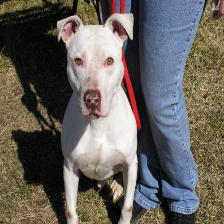

1/1 [==============================] - 0s 21ms/step
Dog


In [ ]:
input_image_path = input("Path of the image ")
input_image = cv2.imread(input_image_path)
input_image = cv2.resize(input_image, (224,224))
cv2_imshow(input_image)
input_image = input_image/255
input_image = np.reshape(input_image, [1,224,224,3])



prediction = model.predict(input_image)
predict_label = np.argmax(prediction)

if(predict_label == 0):
  text = "Cat"
  print("Cat")
else:
  text = "Dog"
  print("Dog")


# Convert text to speech
tts = gTTS(text=text, lang='en')

# Save the audio to a file
tts.save("output.mp3")

# Play the audio
Audio("output.mp3")
